Noise reduction;<br>
Gradient calculation;<br>
Non-maximum suppression;<br>
Double threshold;<br>
Edge Tracking by Hysteresis.

# Noise Reduction

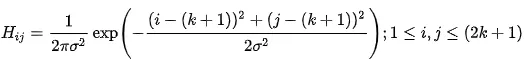

In [1]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    return (1 / (2.0 * np.pi * sigma**2)) * np.exp(-((x**2 + y**2) / (2.0*sigma**2)))

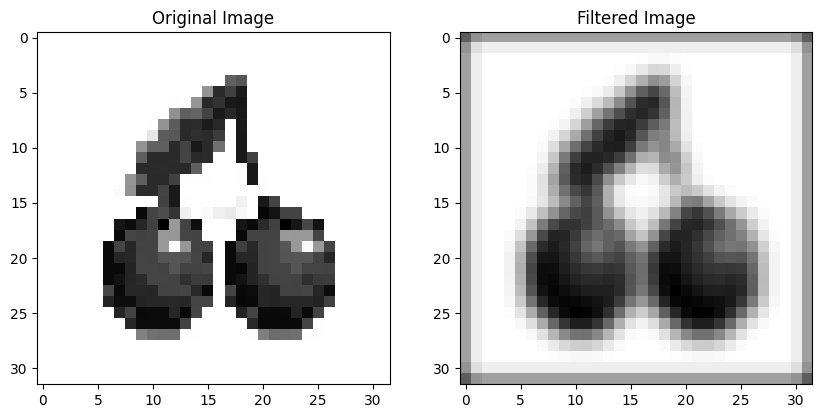

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def convolve(img, kernel):
    m, n = img.shape
    km, kn = kernel.shape
    pad_img = np.pad(img, ((km//2, km//2), (kn//2, kn//2)), mode='constant')

    result = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            result[i, j] = np.sum(pad_img[i:i+km, j:j+kn] * kernel)

    return result

image_url = "/content/photo-179922618.webp"
image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (32,32))
kernel_size = 5
sigma = 1

kernel = gaussian_kernel(kernel_size, sigma)
result_image = convolve(image, kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Filtered Image')

plt.show()

In [63]:
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        print(image[row, col], end=' ')
    print()

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 115 104 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 159 66 86 51 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 253 254 160 63 72 50 47 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 157 112 116 87 51 64 49 255 255 255 255 255 255 255 255 

In [ ]:
for row in range(result_image.shape[0]):
    for col in range(result_image.shape[1]):
        print(result_image[row, col], end=' ')
    print()

123.13734002617649 166.0146764731363 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 175.58190342128452 166.0146764731363 123.13734002617649 
166.0146764731363 223.8222199587975 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454038 236.72082639454

# Gradient Calculation

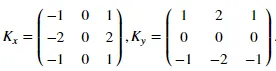

In [5]:
import numpy as np

def convolve(img, kernel):
    m, n = img.shape
    km, kn = kernel.shape
    pad_img = np.pad(img, ((km//2, km//2), (kn//2, kn//2)), mode='constant')

    result = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            result[i, j] = np.sum(pad_img[i:i+km, j:j+kn] * kernel)

    return result

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = convolve(img, Kx)
    Iy = convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)


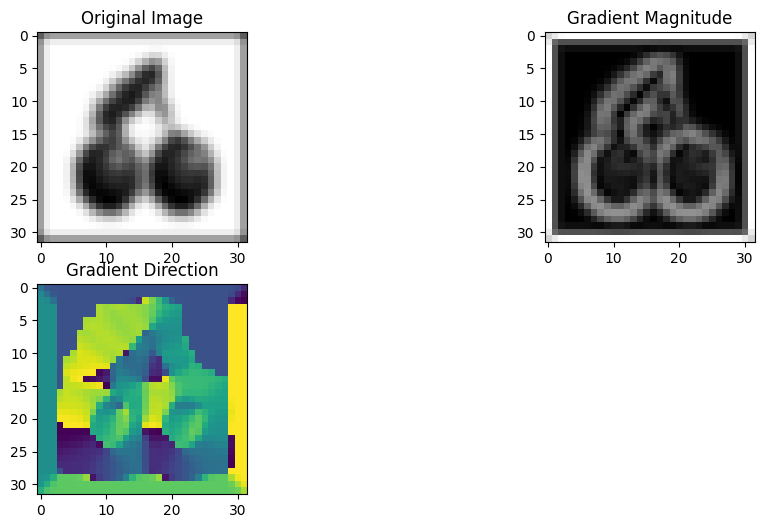

In [6]:
gradient_magnitude, gradient_direction = sobel_filters(result_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(result_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(2, 2, 3)
plt.imshow(gradient_direction, cmap='viridis')
plt.title('Gradient Direction')

plt.show()

In [7]:
for row in range(gradient_magnitude.shape[0]):
    for col in range(gradient_magnitude.shape[1]):
        print("{:.2f}".format(gradient_magnitude[row, col]), end=' ')
    print()


211.70 233.84 251.67 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 255.00 251.67 233.84 211.70 
233.84 102.31 80.55 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.45 79.73 77.89 75.89 75.84 77.80 79.68 80.44 80.56 80.56 80.56 80.56 80.56 80.56 80.56 80.55 102.31 233.84 
251.67 80.55 20.50 14.70 14.70 14.70 14.70 14.70 14.70 14.70 14.70 14.70 14.62 14.07 11.97 7.96 10.60 15.90 14.93 9.98 10.82 14.03 14.70 14.70 14.70 14.70 14.70 14.70 14.70 20.50 80.55 251.67 
255.00 80.56 14.70 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.14 1.42 6.92 20.76 44.41 70.28 81.03 74.02 52.20 21.29 3.65 0.00 0.00 0.00 0.00 0.00 0.00 0.00 14.70 80.56 255.00 
255.00 80.56 14.70 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.83 3.14 10.03 28.26 60.92 98.23 120.66 113.60 105.29 87.68 39.27 7.08 0.00 0.00 0.00 0.00 0.00 0.00 0.00 14.70 80.56 255.00 
255.00 80.56 14.70 0.00 0.00

# Non-Maximum Suppression

Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;<br>
Identify the edge direction based on the angle value from the angle matrix;<br>
Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;<br>
Return the image processed with the non-max suppression algorithm.

In [8]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180


    for i in range(1,M-1):
        for j in range(1,N-1):
          q=255
          r=255
          if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = img[i, j+1]
            r = img[i, j-1]
          elif (22.5 <= angle[i,j] < 67.5):
            q = img[i+1, j-1]
            r = img[i-1, j+1]
          elif (67.5 <= angle[i,j] < 112.5):
            q = img[i+1, j]
            r = img[i-1, j]
          elif (112.5 <= angle[i,j] < 157.5):
            q = img[i-1, j-1]
            r = img[i+1, j+1]

          if (img[i,j] >= q) and (img[i,j] >= r):
            Z[i,j] = img[i,j]
          else:
            Z[i,j] = 0

    return Z

Text(0.5, 1.0, 'Final Image')

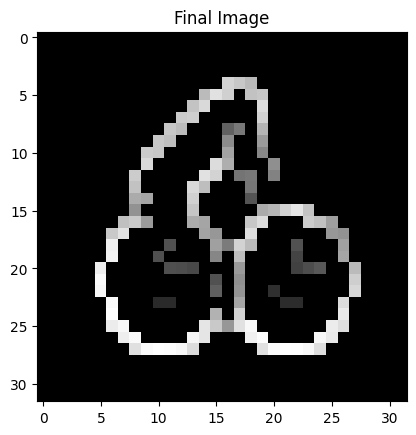

In [9]:
final_image = non_max_suppression(gradient_magnitude, gradient_direction)
plt.imshow(final_image, cmap='gray')
plt.title('Final Image')


In [10]:
image_path = "/content/ANGELA.JPG"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel_size = 5
sigma = 1

kernel = gaussian_kernel(kernel_size, sigma)
result_image = cv2.filter2D(image, -1, kernel)

In [11]:
gradient_magnitude, gradient_direction = sobel_filters(result_image)

Text(0.5, 1.0, 'Final Image')

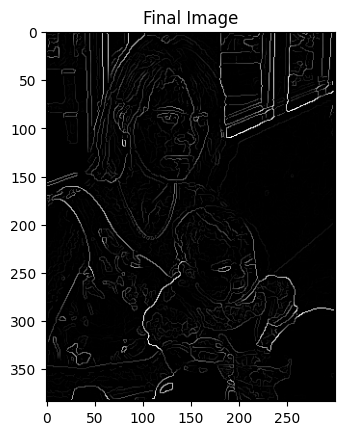

In [12]:
final_image = non_max_suppression(gradient_magnitude, gradient_direction)
plt.imshow(final_image, cmap='gray')
plt.title('Final Image')


# Double threshold

The double threshold step aims at identifying 3 kinds of pixels: strong, weak, and non-relevant:

Strong pixels are pixels that have an intensity so high that we are sure they contribute to the final edge.<br>
Weak pixels are pixels that have an intensity value that is not enough to be considered as strong ones, but yet not small enough to be considered as non-relevant for the edge detection.<br>
Other pixels are considered as non-relevant for the edge.

In [13]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):

    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(255)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

In [14]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

Text(0.5, 1.0, 'Final Image')

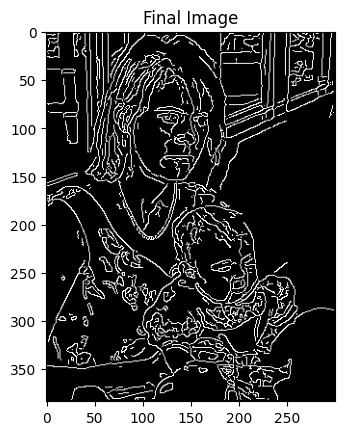

In [15]:
res,weak,strong = threshold(final_image)

plt.imshow(hysteresis(res,weak,strong), cmap='gray')
plt.title('Final Image')

In [17]:
def cannyedge(img1, kernel_size=5,sigma=1,lowThresholdRatio=0.05, highThresholdRatio=0.09):
  image = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)
  kernel = gaussian_kernel(kernel_size, sigma)
  result_image = convolve(img1, kernel)
  gradient_magnitude, gradient_direction = sobel_filters(result_image)
  final_image = non_max_suppression(gradient_magnitude, gradient_direction)
  res,weak,strong = threshold(final_image)
  return hysteresis(res,weak,strong)


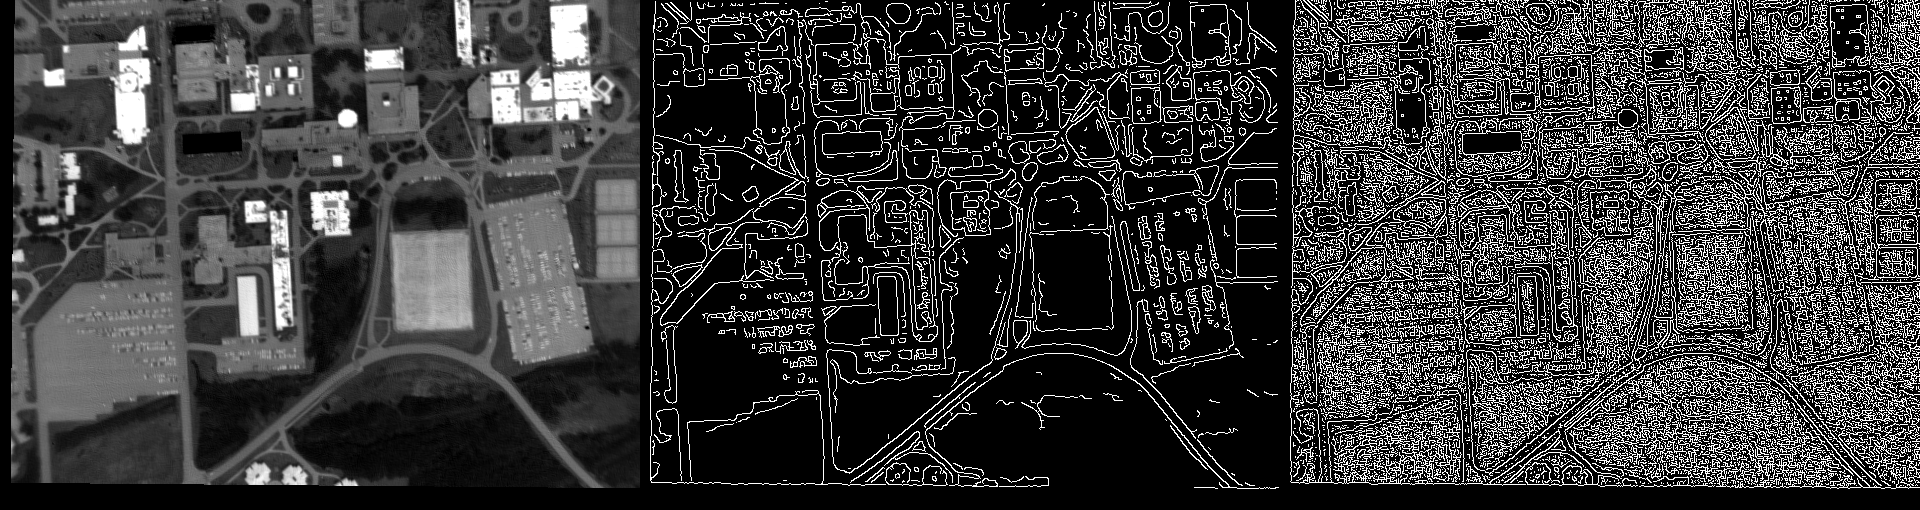

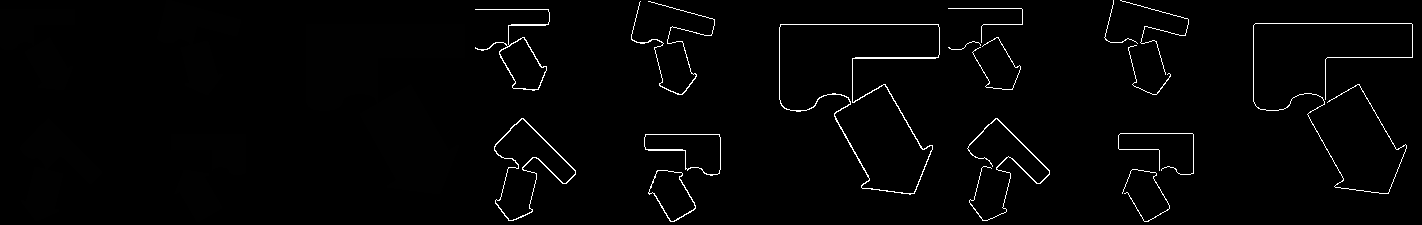

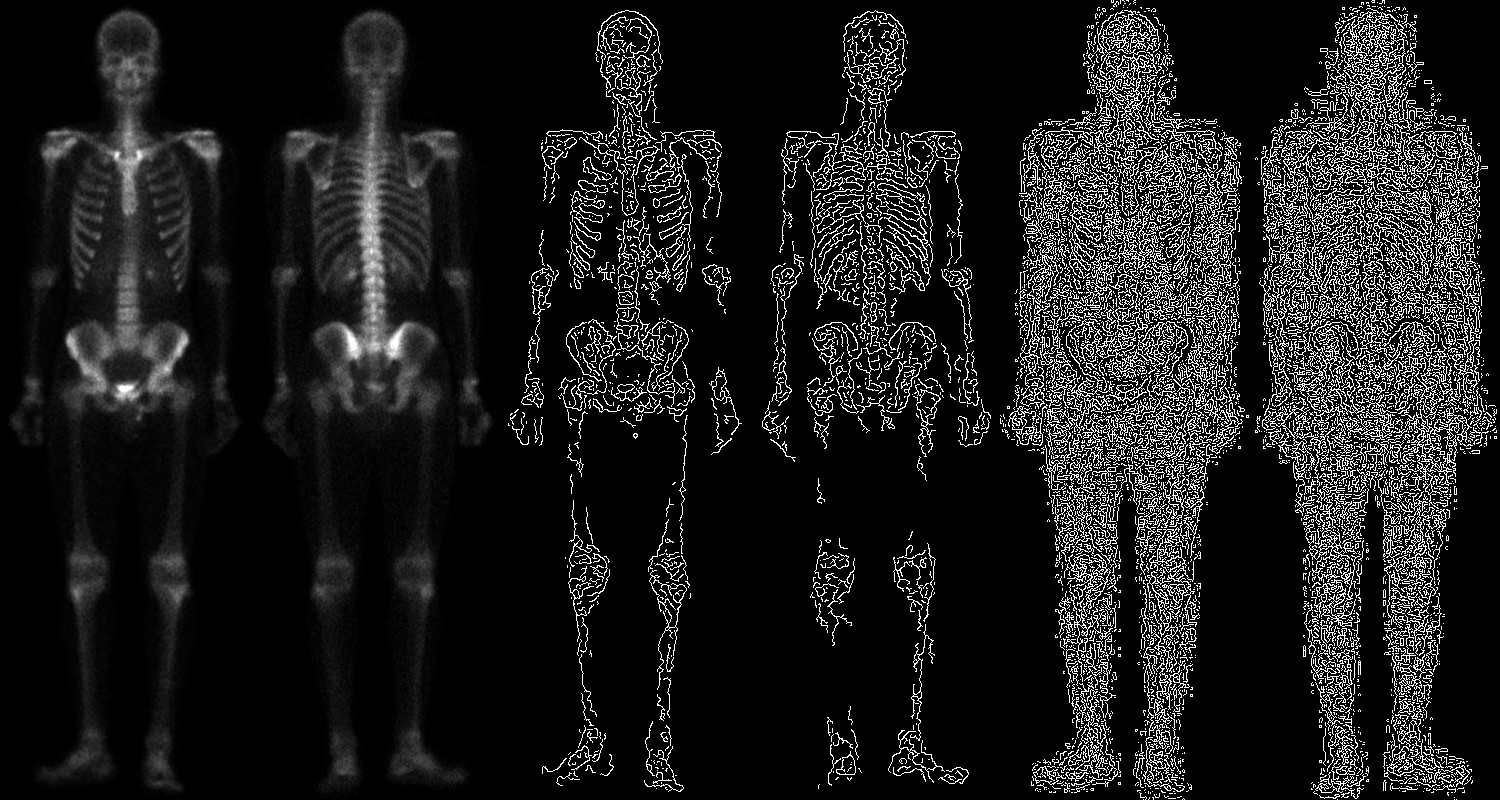

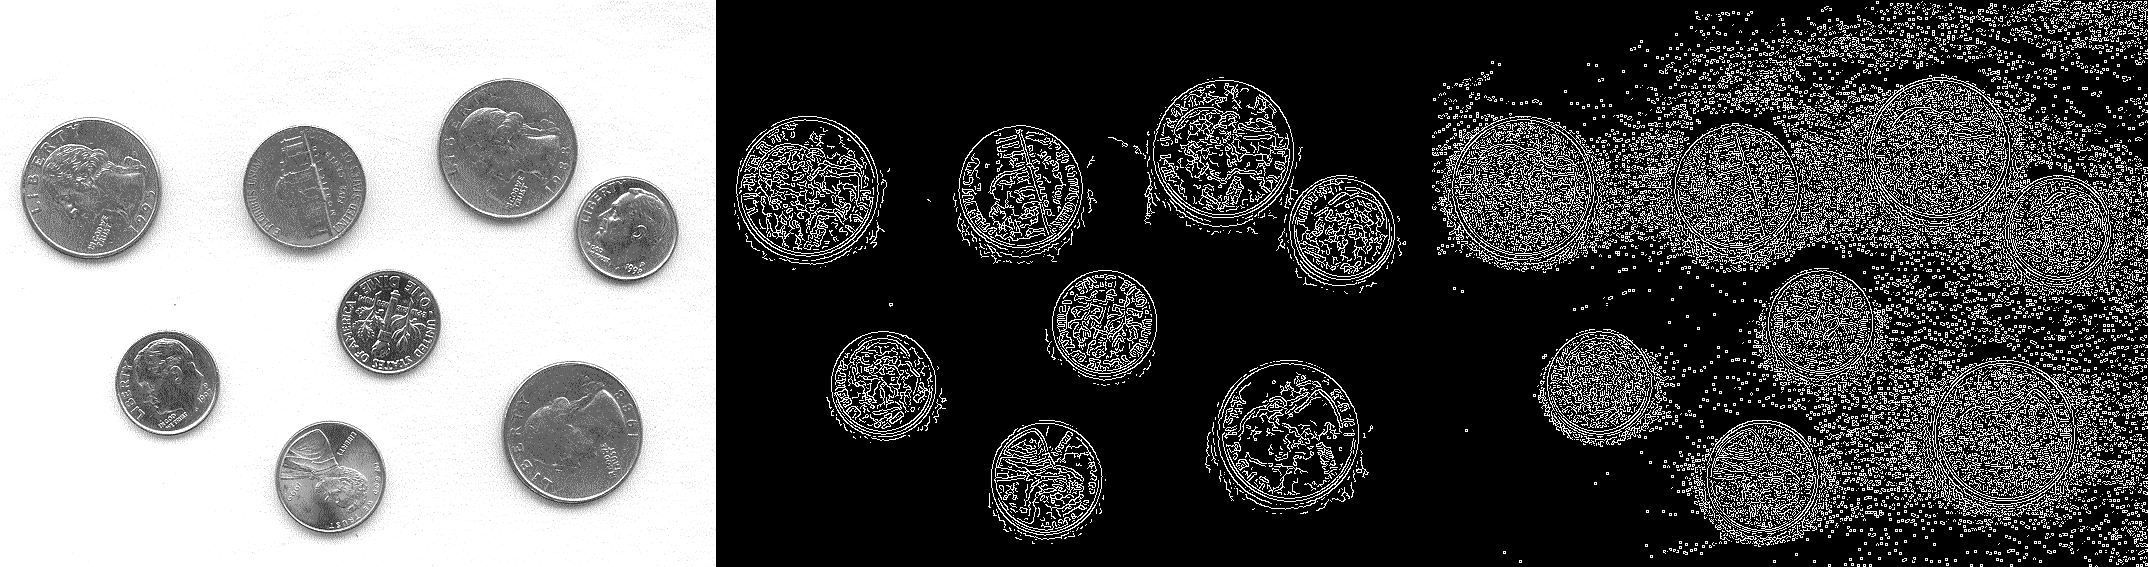

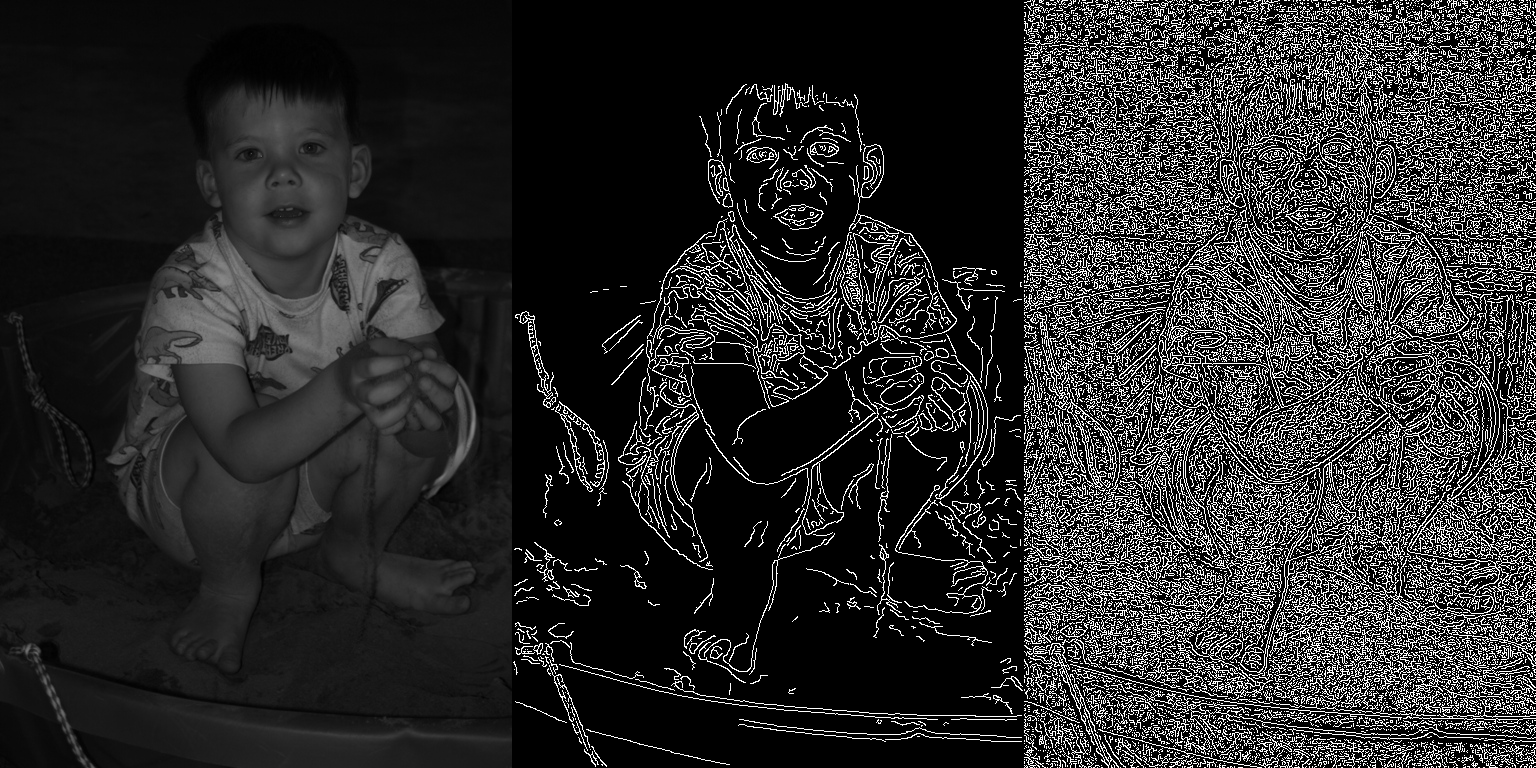

In [31]:
from google.colab.patches import cv2_imshow
# List of image URLs
image_urls = [
    "/content/LWIR087c.png",
    "/content/shapes2.png",
    "/content/GWFig3_46a.jpg",
    "/content/coins1.png",
    "/content/boy.jpg"

    # Add more image URLs as needed
]

# Loop through each image URL
for image_url in image_urls:
    # Read the image from the URL
    image = cv2.imread(image_url, 0)

    # Apply your custom Canny edge detector
    custom_canny_output = cannyedge(image)

    # Apply OpenCV's Canny edge detector
    low_threshold =  0.05
    high_threshold = 0.09
    opencv_canny_output = cv2.Canny(image, low_threshold, high_threshold)

    cv2_imshow(np.hstack([image, custom_canny_output, opencv_canny_output]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


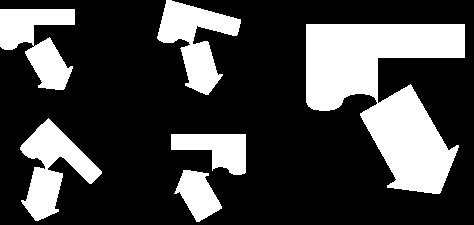

In [7]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/shapes2.png",cv2.IMREAD_GRAYSCALE)
# cv2_imshow(image)
print(image)
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if(image[i][j]!=0):
      image[i][j]=255

cv2_imshow(image)